### Plotting routine for checking improved optical constant (nk)-code
testing on 100CO_26CO2_10K

with the following standard setups:

d = 2.5e-4  (25e-4) # converte parameter to cm

n0 = 1.22 (1.16)

n2 = 1.73 (1.73)

error = 0.001 (0.001)

if CO-composite ice:
   n0 = 1.22
   
if H2O-composite ice:
   d = 0.5 * 1e-4

In [19]:
#read in data from ym script
import numpy as np
import matplotlib.pyplot as plt

In [28]:
path1 = './results/d0.00025_n01.16_n21.73_err0.0001_pureCO2_10K_test_quick5_kn_constants.lnk'
lam, n_tn, k_tn = np.loadtxt(path1, usecols=(0,1,2), comments = '#', skiprows=4, unpack=True)

#lam2, n_tn2, k_tn2 = np.loadtxt(path3, usecols=(0,1,2), comments = '#', unpack=True)

In [29]:
path2k = './ref_data/K.txt'
path2n = './ref_data/N.txt'
lam_wr, k_wr = np.loadtxt(path2k, delimiter=' ', usecols=(0, 1), comments = '#', unpack=True)
lam_wr, n_wr = np.loadtxt(path2n, delimiter=' ', usecols=(0, 1), comments = '#', unpack=True)

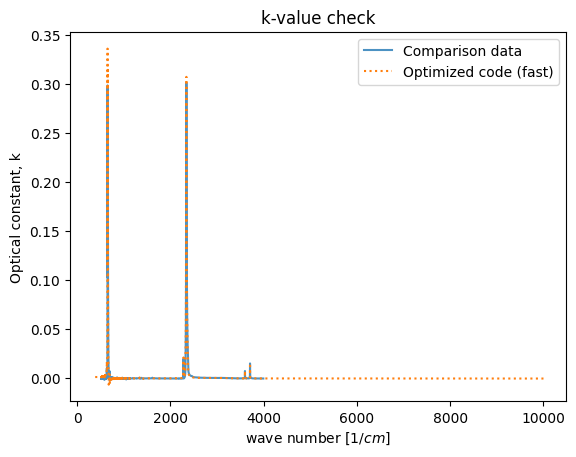

In [30]:
plt.plot(lam_wr,k_wr, label = 'Comparison data',alpha=0.8)
plt.plot(1e4/lam,k_tn,':', label = 'Optimized code (fast)')

plt.ylabel('Optical constant, k')
plt.xlabel(r'wave number $[1/cm]$')
plt.title('k-value check')
plt.legend()
plt.savefig('./plots/k_const.pdf', dpi='figure', format='pdf')

Text(0.5, 1.0, 'n-value check')

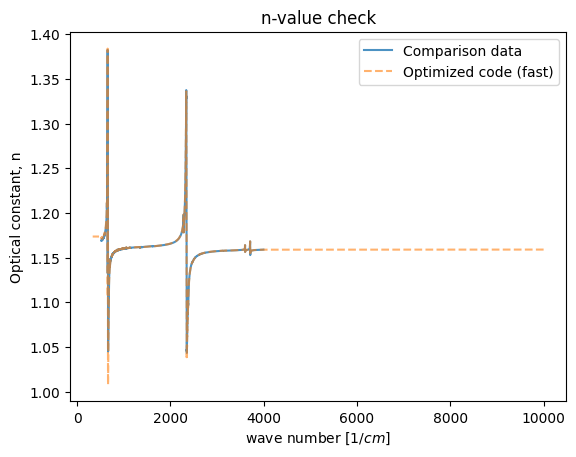

In [31]:
plt.plot(lam_wr, n_wr, label = 'Comparison data', alpha = 0.8)

plt.plot(1e4/lam, n_tn,'--', label = 'Optimized code (fast)',alpha =0.6)

plt.ylabel('Optical constant, n')
plt.xlabel(r'wave number $[1/cm]$')
plt.legend()
plt.savefig('./plots/n_const.pdf', dpi='figure', format='pdf')
plt.title('n-value check')

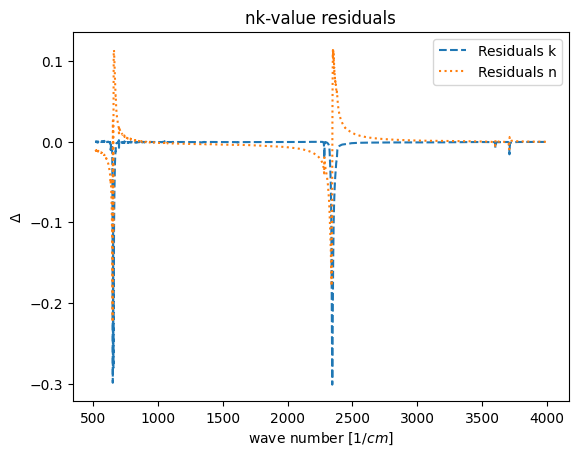

In [44]:
# calculate the residuals
# reduce length of new dataset (because it covers a broader wavelength range with higher resolution [more points])
plt.plot(lam_wr, k_tn[:len(k_wr)]-k_wr,'--', label = 'Residuals k')
plt.plot(lam_wr, n_tn[:len(n_wr)]-n_wr,':', label = 'Residuals n')

plt.ylabel('$\Delta$')
plt.xlabel(r'wave number $[1/cm]$')
plt.title('nk-value residuals')
plt.legend()
plt.savefig('./plots/opt_const_residuals.pdf', dpi='figure', format='pdf')